<a href="https://colab.research.google.com/github/zabihin/Walmart/blob/main/bloc_3_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

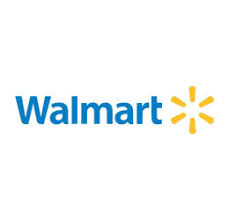

PROJECTS Supervised Machine Learning

Walmart : **predict weekly sales**
Company's Description 📇
Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

Project 🚧
Walmart's marketing service has asked you **to build a machine learning model able to estimate the weekly sales in their stores**, with the best precision possible on the predictions made. Such a model would help them understand better **how the sales are influenced by economic indicators**, and might be used to plan future marketing campaigns.

Goals 🎯
The project can be divided into three steps:

**Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning**

**Part 2 : train a linear regression model (baseline)**

**Part 3: avoid overfitting by training a regularized regression model Scope of this project** 🖼️


 Import Libraries

In [36]:
import pandas as pd
import sklearn

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression ,Ridge,Lasso
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

Load Data

In [2]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Walmart_Store_sales.csv")
print("...Done.")
print()

Loading dataset...
...Done.



### Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning

###  Dataset Info

In [3]:

dataset.shape

(150, 8)

there are 150 rows so we don't have a lot of data

In [4]:
print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

No feature has too many missing values 🤠




but Weekley_Sales are our target and we should drop lines where target values are missing

In [5]:
dataset = dataset.dropna(axis=0, subset=['Weekly_Sales'])

In [6]:
print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,136.000000,118,1.360000e+02,125.000000,121.000000,124.000000,125.000000,122.000000
unique,NaN,79,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
mean,10.014706,NaN,1.249536e+06,0.072000,60.853967,3.316992,178.091144,7.665582
std,6.124614,NaN,6.474630e+05,0.259528,18.514432,0.479540,40.243105,1.619428
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.220000,2.838500,131.637000,6.690000
50%,10.000000,NaN,1.261424e+06,0.000000,62.250000,3.451000,196.919506,7.477000
75%,15.250000,NaN,1.806386e+06,0.000000,75.950000,3.724000,214.878556,8.150000



Percentage of missing values: 


Store            0.000000
Date            13.235294
Weekly_Sales     0.000000
Holiday_Flag     8.088235
Temperature     11.029412
Fuel_Price       8.823529
CPI              8.088235
Unemployment    10.294118
dtype: float64

extract the week of the year from the date time column



In [7]:
dataset['Date']=pd.to_datetime(dataset['Date'], errors='ignore');
dataset['weekofyear'] = dataset['Date'].dt.weekofyear


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
dataset.duplicated().sum()


0

In [9]:
dataset.shape

(136, 9)

## Drop lines containing invalid values or outliers 

 In this project, will be considered as outliers all the numeric features that don't fall within the range :  [𝑋¯−3𝜎,𝑋¯+3𝜎] . This concerns the columns : Temperature, Fuel_price, CPI and Unemployment

In [10]:
print('Dropping outliers in Temperature ...')
low =  dataset['Temperature'].mean() - 3 *  dataset['Temperature'].std()
high =  dataset['Temperature'].mean() + 3 *  dataset['Temperature'].std()
print('The number of outliers in {} is {}'.format('Temperature', dataset.loc[(dataset['Temperature'] <= low) | (dataset['Temperature'] >= high)].shape[0]))


print('Dropping outliers in Fuel_price ...')
low =  dataset['Fuel_Price'].mean() - 3 *  dataset['Fuel_Price'].std()
high =  dataset['Fuel_Price'].mean() + 3 *  dataset['Fuel_Price'].std()
print('The number of outliers in {} is {}'.format('Fuel_Price', dataset.loc[(dataset['Fuel_Price'] <= low) | (dataset['Fuel_Price'] >= high)].shape[0]))


print('Dropping outliers in CPI ...')
low =  dataset['CPI'].mean() - 3 *  dataset['CPI'].std()
high =  dataset['CPI'].mean() + 3 *  dataset['CPI'].std()
print('The number of outliers in {} is {}'.format('CPI', dataset.loc[(dataset['CPI'] <= low) | (dataset['CPI'] >= high)].shape[0]))



print('Dropping outliers in Unemployment ...')
low =  dataset['Unemployment'].mean() - 3 *  dataset['Unemployment'].std()
high =  dataset['Unemployment'].mean() + 3 *  dataset['Unemployment'].std()
print('The number of outliers in {} is {}'.format('Unemployment', dataset.loc[(dataset['Unemployment'] <= low) | (dataset['Unemployment'] >= high)].shape[0]))



Dropping outliers in Temperature ...
The number of outliers in Temperature is 0
Dropping outliers in Fuel_price ...
The number of outliers in Fuel_Price is 0
Dropping outliers in CPI ...
The number of outliers in CPI is 0
Dropping outliers in Unemployment ...
The number of outliers in Unemployment is 5


In [11]:
low =  dataset['Unemployment'].mean() - 3 *  dataset['Unemployment'].std()
high =  dataset['Unemployment'].mean() + 3 *  dataset['Unemployment'].std()
dataset=dataset.drop(dataset.loc[(dataset['Unemployment'] <= low) | (dataset['Unemployment'] >= high)].index)
dataset.shape


(131, 9)

## Visualization

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

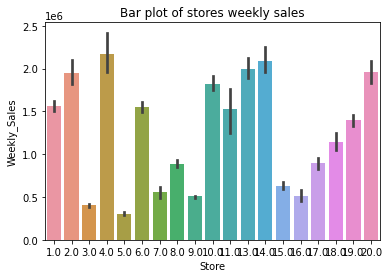

In [13]:
fig = sns.barplot(data = dataset, x = 'Store', y = 'Weekly_Sales')
fig.set_title("Bar plot of stores weekly sales")
plt.show()

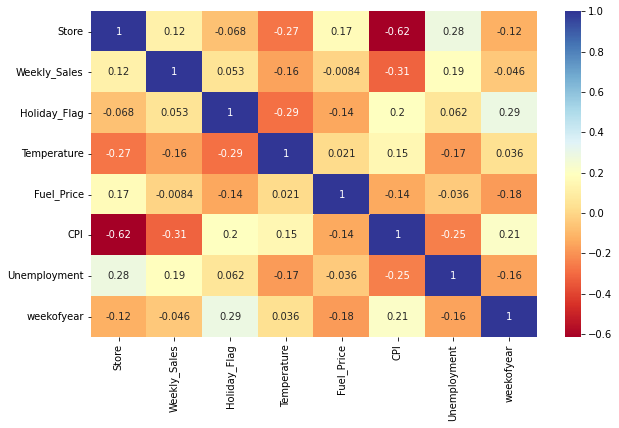

In [14]:
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap='RdYlBu',annot=True)
plt.show()

cpi has the highest negative correlation with weekly_sale

unemployment has the highest positive correlation=> because walmart is a low cost store.

##Preprossesing

In [15]:
to_drop = ['Date', 'Weekly_Sales']
features = [c for c in dataset.columns if c not in to_drop]
target_name = 'Weekly_Sales'

X = dataset.loc[:, features]
Y = dataset.loc[:,target_name]


In [16]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
# WARNING : don't forget stratify=Y for classification problems
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [17]:
numeric_indices =[2,3,4,5,6]
categorical_indices = [0,1]

# numeric transformation 
numeric_transformer = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(strategy="mean")),
        ("num_scaler", StandardScaler())
    ]
)

# catogerical
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = preprocessor.fit_transform(X_train)
print("...Done")




X_test = preprocessor.transform(X_test)
print("...Done")




...Done
...Done


In [18]:
cat_feat_names = list(preprocessor.transformers_[0][1].named_steps['encoder'].get_feature_names(['Store', 'Holiday_Flag']))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
feature_name=cat_feat_names+['Temperature','Fuel_Price','CPI','Unemployment','weekofyear']

# Part 2 : linear regression to predict weekly_sales ,Baseline model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  GridSearchCV, cross_val_score


In [21]:
# Train model

#Perform cross validation on the train set
reg = LinearRegression()
scores = cross_val_score(reg, X_train, Y_train, cv=5)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())
print()


The cross-validated R2-score is :  0.938062876673653
The standard deviation is :  0.019148356803327323



In [22]:
# train the linear regression model
print("Training model")
reg.fit(X_train, Y_train)
print('...Done')
print()

Training model
...Done



In [23]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = reg.predict(X_train)
print("...Done.")


Predictions on training set...
...Done.


In [24]:
Y_test_pred = reg.predict(X_test)


In [25]:
from sklearn.metrics import r2_score


In [26]:
# make predictions and print r-2 score on the train set

print("R2 score on train set: ", r2_score(Y_train, Y_train_pred))
print()

# make predictions and print r-2 score on the test set

print("R2 score on test set: ", r2_score(Y_test, Y_test_pred))




R2 score on train set:  0.9656339534500529

R2 score on test set:  0.9362803273132703


In [27]:
cat_feat_names = list(preprocessor.transformers_[0][1].named_steps['encoder'].get_feature_names(['Store', 'Holiday_Flag']))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
feature_name=cat_feat_names+['Temperature','Fuel_Price','CPI','Unemployment','weekofyear']

In [29]:
# print the coefficients for each feature
data = {'coefficients' : reg.coef_, 'abs_coeff': abs(reg.coef_)}
df_coef = pd.DataFrame(data = data, index = feature_name)
df_coef = df_coef.sort_values(by = 'abs_coeff', ascending = False)
df_coef

,coefficients,abs_coeff
Store_5.0,-1.365591e+06,1.365591e+06
Store_9.0,-1.223603e+06,1.223603e+06
Store_3.0,-1.215827e+06,1.215827e+06
Store_16.0,-1.106561e+06,1.106561e+06
Store_7.0,-9.092703e+05,9.092703e+05
Store_8.0,-7.780083e+05,7.780083e+05
Store_15.0,-7.079402e+05,7.079402e+05
Store_14.0,6.627086e+05,6.627086e+05
Store_17.0,-6.423066e+05,6.423066e+05
Store_4.0,6.079860e+05,6.079860e+05


Individual stores have the highest coefficients, which doesn't really help us understand what external factors impact weekly sales
It tells us that stores 5, 3, 9 drive the weekly sales down and we should maybe focus on how to improve that 

##Fight overfitting



In [38]:
# Instanciating 4 models of ridge regression with different alpha values
ridge_reg_small_alpha = Ridge(alpha = 0.01)
ridge_reg_large_alpha = Ridge(alpha = 100)
lasso_reg_small_alpha=Lasso(alpha = 0.01)
lasso_reg_large_alpha=Lasso(alpha = 100)
ridge_reg_small_alpha.fit(X_train, Y_train)
ridge_reg_large_alpha.fit(X_train, Y_train)
lasso_reg_small_alpha.fit(X_train, Y_train)
lasso_reg_large_alpha.fit(X_train, Y_train)

Lasso(alpha=100)

In [39]:
print("Score on training: ")
print("Linear Regression score : {}".format(reg.score(X_train, Y_train)))
print("Ridge with small Alpha score : {}".format(ridge_reg_small_alpha.score(X_train,   Y_train)))
print("Ridge with large Alpha score : {}".format(ridge_reg_large_alpha.score(X_train,Y_train)))
print("Lasso with small Alpha score : {}".format(lasso_reg_small_alpha.score(X_train,   Y_train)))
print("Lasso with large Alpha score : {}".format(lasso_reg_large_alpha.score(X_train,Y_train)))

Score on training: 
Linear Regression score : 0.9656339534500529
Ridge with small Alpha score : 0.9656154667040845
Ridge with large Alpha score : 0.18313183327171811
Lasso with small Alpha score : 0.9656339534498246
Lasso with large Alpha score : 0.9656104474950913


In [43]:
params = {'alpha': np.arange(0, 1000, 100)} # determine the range of parameters to try
lasso = Lasso() # create an instance of the model

grid = GridSearchCV(lasso, params, cv = 10, verbose = 0)
grid_fit = grid.fit(X_train, Y_train)

print("Optimal value for alpha : ", grid_fit.best_params_)

print('Train score for the best model : ', grid_fit.best_estimator_.score(X_train,Y_train))
print('Test score for the best model : ', grid_fit.best_estimator_.score(X_test,Y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 648711534387.435, tolerance: 4063733989.6724744
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 656199699959.5908, tolerance: 4011

Optimal value for alpha :  {'alpha': 400}
Train score for the best model :  0.965295008108108
Test score for the best model :  0.9410372628506858
